In [1]:
!pip install pandas
!pip install catboost
!pip install sklearn
!pip install imblearn

     |████████████████████████████████| 199 kB 506 kB/s            
     |████████████████████████████████| 8.0 MB 16.8 MB/s            
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0
    Uninstalling scikit-learn-1.0:
      Successfully uninstalled scikit-learn-1.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

#from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import RandomOverSampler


from catboost import CatBoostClassifier


In [3]:
def run_train(model: 'Model', params: dict, X_train, X_test, y_train, y_test):
    model_ = model(**params)
    model_.fit(X_train, y_train)

    y_train_pred = model_.predict_proba(X_train)
    y_test_pred = model_.predict_proba(X_test)
    
    return model_, y_train_pred, y_test_pred

In [4]:
df = pd.read_csv('train.csv')
columns = df.columns

X = df[columns[:-1]]
y = df[columns[-1]]

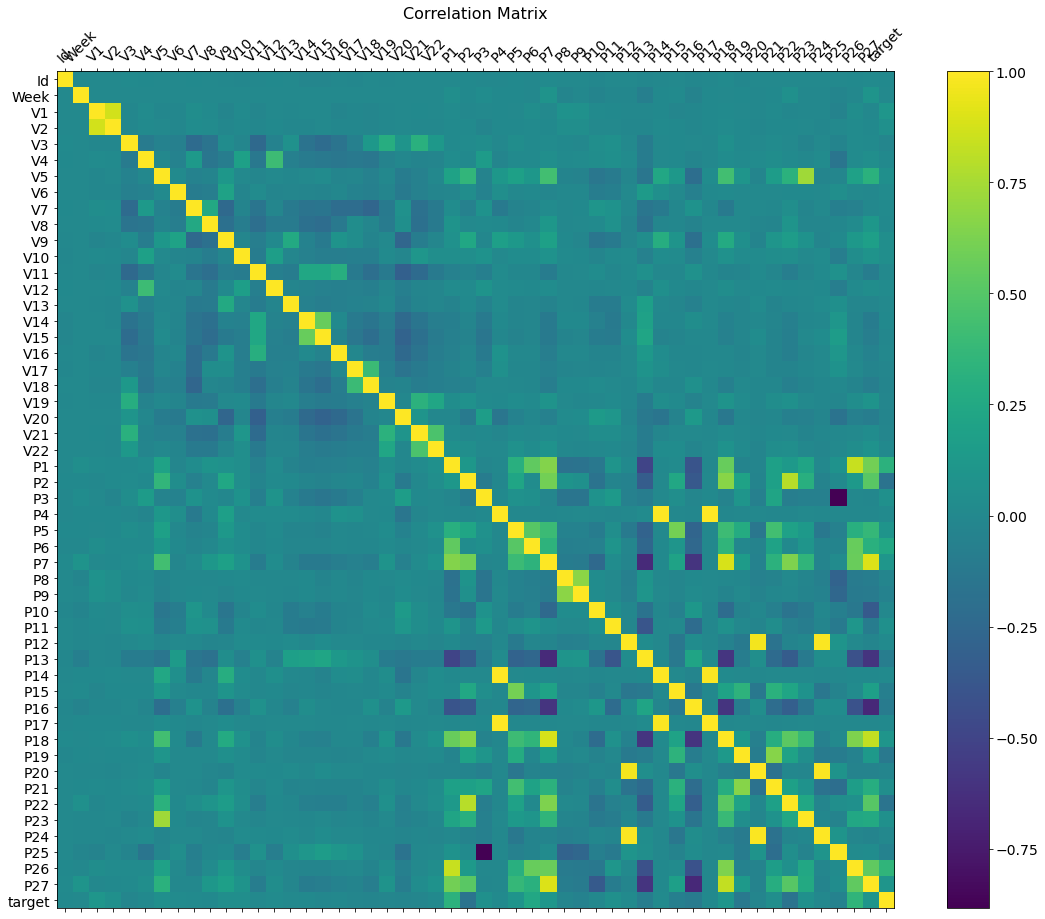

In [5]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [6]:
X_ids = X['Id']
X_week = X['Week']
X.drop('Id', inplace=True, axis=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
num_pipline = Pipeline([
        ('scaler', MinMaxScaler())
])

In [8]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
y_ros.shape, X_ros.shape

((51032,), (51032, 50))

In [9]:
X_tr = num_pipline.fit_transform(X_ros)
X_tr = pd.DataFrame(X_tr, columns=columns[1:-1])

In [10]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X_tr, y_ros):
    X_train, X_test = X_tr.iloc[train_index], X_tr.iloc[test_index]
    y_train, y_test = y_ros.iloc[train_index], y_ros.iloc[test_index]

In [11]:
catb_params = {'depth' : 8, 'learning_rate' : 0.25, 'iterations': 2000}

catb_clf, y_tain_cat_pred, y_test_cat_pred = run_train(CatBoostClassifier, catb_params, X_train, X_test, y_train, y_test)


0:	learn: 0.5448486	total: 86.4ms	remaining: 2m 52s
1:	learn: 0.4611522	total: 105ms	remaining: 1m 44s
2:	learn: 0.4233851	total: 125ms	remaining: 1m 23s
3:	learn: 0.3955096	total: 147ms	remaining: 1m 13s
4:	learn: 0.3791616	total: 168ms	remaining: 1m 6s
5:	learn: 0.3647986	total: 187ms	remaining: 1m 2s
6:	learn: 0.3519963	total: 210ms	remaining: 59.9s
7:	learn: 0.3428599	total: 229ms	remaining: 56.9s
8:	learn: 0.3375717	total: 248ms	remaining: 54.9s
9:	learn: 0.3297271	total: 268ms	remaining: 53.3s
10:	learn: 0.3254634	total: 287ms	remaining: 51.9s
11:	learn: 0.3154686	total: 306ms	remaining: 50.8s
12:	learn: 0.3098557	total: 333ms	remaining: 50.9s
13:	learn: 0.3057023	total: 375ms	remaining: 53.1s
14:	learn: 0.3016672	total: 432ms	remaining: 57.1s
15:	learn: 0.2982597	total: 520ms	remaining: 1m 4s
16:	learn: 0.2921005	total: 609ms	remaining: 1m 11s
17:	learn: 0.2873142	total: 680ms	remaining: 1m 14s
18:	learn: 0.2823660	total: 806ms	remaining: 1m 24s
19:	learn: 0.2797444	total: 863ms

In [13]:
df_val = pd.read_csv('test.csv')
df_val_id = df_val['Id']
df_val_week = df_val['Week']
val_columns = df_val.columns.tolist()
df_val.drop('Id', inplace=True, axis=1)

In [14]:
df_val_tr = num_pipline.fit_transform(df_val)
df_val_tr = pd.DataFrame(df_val_tr, columns=val_columns[1:])
df_val_tr

,Week,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27
0,0.000000,0.00000,0.000000,0.015697,0.028448,0.0,0.013947,0.032552,0.042432,0.355791,...,0.414770,0.050208,0.740741,0.097598,0.359175,0.00000,0.737382,0.902439,0.085202,0.642857
1,0.333333,0.00000,0.000000,0.015697,0.028448,0.0,0.013947,0.032552,0.042432,0.355791,...,0.442176,0.046290,0.722222,0.100020,0.479374,0.00000,0.715141,0.904762,0.123533,0.714286
2,0.666667,0.00000,0.000000,0.015697,0.028448,0.0,0.013947,0.032552,0.042432,0.355791,...,0.414169,0.094024,0.722222,0.093903,0.342105,0.00000,0.730539,0.900000,0.039495,0.821429
3,1.000000,0.00000,0.000000,0.015697,0.028448,0.0,0.013947,0.032552,0.042432,0.355791,...,0.401880,0.047905,0.722222,0.086737,0.392603,0.03125,0.730539,0.937500,0.021079,0.656250
4,0.000000,0.00000,0.000000,0.000000,0.205345,0.0,0.000000,0.333618,0.000000,0.113090,...,0.116600,0.036805,0.962963,0.065013,0.105263,0.00000,0.964072,0.190476,0.047639,0.095238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13223,1.000000,0.00000,0.000000,0.010143,0.015827,0.0,0.000000,0.378547,0.324356,0.004914,...,0.104440,0.054779,0.851852,0.081114,0.231152,0.00000,0.856287,0.730769,0.017825,0.538462
13224,0.000000,0.07906,0.041667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13225,0.333333,0.07906,0.041667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13226,0.666667,0.07906,0.041667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.287368,0.035018,0.796296,0.080397,0.189189,0.00000,0.759281,0.000000,0.106477,0.200000


In [15]:
df_val_tr_pred = catb_clf.predict_proba(df_val_tr)
df_val_tr_pred = pd.DataFrame(df_val_tr_pred)
df_val_tr_pred

,0,1
0,0.995761,0.004239
1,0.999165,0.000835
2,0.999333,0.000667
3,0.998531,0.001469
4,0.545824,0.454176
...,...,...
13223,0.995249,0.004751
13224,0.274807,0.725193
13225,0.133785,0.866215
13226,0.008245,0.991755


In [18]:
df_val_pred_tr_id_map = pd.merge(df_val_tr_pred, df_val_id, left_index=True, right_index=True)
result = df_val_pred_tr_id_map.groupby('Id').agg({
    1: np.mean
})
result.rename({1: 'Predicted'}, inplace=True)


In [19]:
result.to_csv('result.csv')